In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

C:\Users\z\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('../input/dataset.csv')
sub = pd.read_csv('../input/submission.csv')
df.head()

,WindNumber,Time,WindSpeed,Power,RotorSpeed
0,1,2017/11/1 0:20,4.188333,65.750000,5.779167
1,1,2017/11/1 0:30,4.042500,120.700000,8.636500
2,1,2017/11/1 0:40,4.137368,135.157895,8.668421
3,1,2017/11/1 0:50,4.274737,157.315789,8.727895
4,1,2017/11/1 1:00,4.108947,129.894737,8.656842


In [3]:
df1 = df.loc[df['WindNumber'] == 1, :]
df2 = df.loc[df['WindNumber'] == 2, :]
df3 = df.loc[df['WindNumber'] == 3, :]
df4 = df.loc[df['WindNumber'] == 4, :]
df5 = df.loc[df['WindNumber'] == 5, :]
df6 = df.loc[df['WindNumber'] == 6, :]
df7 = df.loc[df['WindNumber'] == 7, :]
df8 = df.loc[df['WindNumber'] == 8, :]
df9 = df.loc[df['WindNumber'] == 9, :]
df10 = df.loc[df['WindNumber'] == 10, :]
df11 = df.loc[df['WindNumber'] == 11, :]
df12 = df.loc[df['WindNumber'] == 12, :]

In [4]:
# fig = plt.figure(figsize=(20, 15))

# for i in range(1, 13):
#     plt.subplot(3, 4, i)
#     plt.scatter(df.loc[df['WindNumber'] == i, :]['WindSpeed'], df.loc[df['WindNumber'] == i, :]['Power'], s=5, c='r', cmap='viridis')
#     plt.xlabel('Wind Speed({})'.format(i))
#     plt.ylabel('Power')
# plt.show()

In [5]:
df1.head()

,WindNumber,Time,WindSpeed,Power,RotorSpeed
0,1,2017/11/1 0:20,4.188333,65.750000,5.779167
1,1,2017/11/1 0:30,4.042500,120.700000,8.636500
2,1,2017/11/1 0:40,4.137368,135.157895,8.668421
3,1,2017/11/1 0:50,4.274737,157.315789,8.727895
4,1,2017/11/1 1:00,4.108947,129.894737,8.656842


In [6]:
df1['WindSpeed_bins'] = pd.cut(df1['WindSpeed'], 50, labels=range(1, 51))
df1['Power_bins'] = pd.cut(df1['Power'], 90, labels=range(1, 91))

In [7]:
df1['WindSpeed'].min(), df1['WindSpeed'].max()

(-0.05, 26.54181818)

In [8]:
df1['Power'].min(), df1['Power'].max()

(-53.0, 2174.4)

In [9]:
df1.head()

,WindNumber,Time,WindSpeed,Power,RotorSpeed,WindSpeed_bins,Power_bins
0,1,2017/11/1 0:20,4.188333,65.750000,5.779167,8,5
1,1,2017/11/1 0:30,4.042500,120.700000,8.636500,8,8
2,1,2017/11/1 0:40,4.137368,135.157895,8.668421,8,8
3,1,2017/11/1 0:50,4.274737,157.315789,8.727895,9,9
4,1,2017/11/1 1:00,4.108947,129.894737,8.656842,8,8


In [10]:
data1 = pd.DataFrame()
for i in range(1, 51):
    bin = df1.loc[df1['WindSpeed_bins'] == i, :]
    q1 = bin['Power'].quantile(0.25)
    q3 = bin['Power'].quantile(0.75)
    iqr = q3 - q1
    low = q1 - 1.5 * iqr
    high = q3 + 1.5 * iqr
    bin['label_1'] = bin['Power'].apply(lambda x: 1 if x > high else 0).astype(int)
    data1 = pd.concat([data1, bin], axis=0, ignore_index=True)

In [11]:
data2 = pd.DataFrame()
for i in range(1, 91):
    bin = df1.loc[df1['Power_bins'] == i, :]
    q1 = bin['WindSpeed'].quantile(0.25)
    q3 = bin['WindSpeed'].quantile(0.75)
    iqr = q3 - q1
    left = q1 - 1.5 * iqr
    right = q3 + 1.5 * iqr
    bin['label_2'] = bin['WindSpeed'].apply(lambda x: 1 if x < left or x > right else 0).astype(int)
    data2 = pd.concat([data2, bin], axis=0, ignore_index=True)

In [12]:
data = pd.merge(data1, data2, on=['WindNumber', 'Time', 'WindSpeed', 'Power', 'RotorSpeed', 'WindSpeed_bins', 'Power_bins'], how='inner')
data.head()

,WindNumber,Time,WindSpeed,Power,RotorSpeed,WindSpeed_bins,Power_bins,label_1,label_2
0,1,2017/11/3 5:20,0.1925,-9.5,0.0425,1,2,0,0
1,1,2017/11/3 5:30,0.4150,-9.5,0.0425,1,2,0,0
2,1,2017/11/3 5:40,0.2100,-9.5,0.0450,1,2,0,0
3,1,2017/11/4 6:40,0.4500,-9.0,0.0700,1,2,0,0
4,1,2017/11/4 18:20,0.3500,-9.5,0.0450,1,2,0,0


In [13]:
data['label'] = data.apply(lambda x: 1 if x['label_1'] == 1 or x['label_2'] == 1 else 0, axis=1)

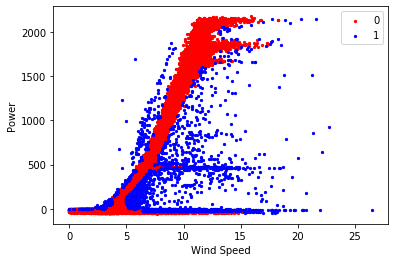

In [14]:
fig = plt.figure()
data_0 = data.loc[data['label'] == 0, :]
data_1 = data.loc[data['label'] == 1, :]
plt.scatter(data_0['WindSpeed'], data_0['Power'], s=5, c='r', cmap='viridis', label='0')
plt.scatter(data_1['WindSpeed'], data_1['Power'], s=5, c='b', cmap='viridis', label='1')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend(loc='best')
plt.show()